# Jupyter Cheatsheet 

#### __Callum Smyth__

## Dependencies

For this the package `rpy2` needs to be installed via the anaconda prompt

In [29]:
import rpy2.rinterface
import pandas as pd
import numpy as np

## Using R Withing a Python 3 Notebook

### Initialising an R instance 

In [3]:
%load_ext rpy2.ipython
# This only has to be ran once per notebook load

Now that the instance is initialised, putting the magic command __%%R__ at the top of a code cell will allow you to write R code in a Python book.

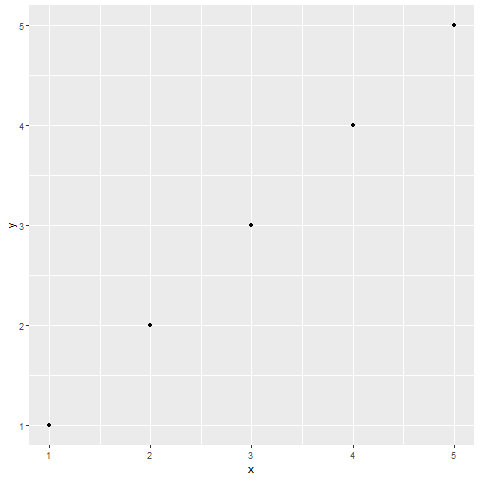

In [6]:
%%R
# ^ this is the magic command so this cell is in R code

# Dependencies
library(ggplot2)

# simple R code to show it is working
x <- c(1:5)
y <- c(1:5)
qplot(x,y)

### Passing Objects Between Python and R

The `rpy2` interface allows us to pass objects between both Python and R allowing for better analysis. An object listed after __-i__ on the __%%R__ magic command line will import that object, and an object listed after __-o__ on the __%%R__ magic command line will be outputted and available in Python.

In [15]:
# Create a simple DataFrame in Python
python_df = pd.DataFrame({'A':range(1,6,1),
                         'B':range(1,6,1)})
print(python_df)

   A  B
0  1  1
1  2  2
2  3  3
3  4  4
4  5  5


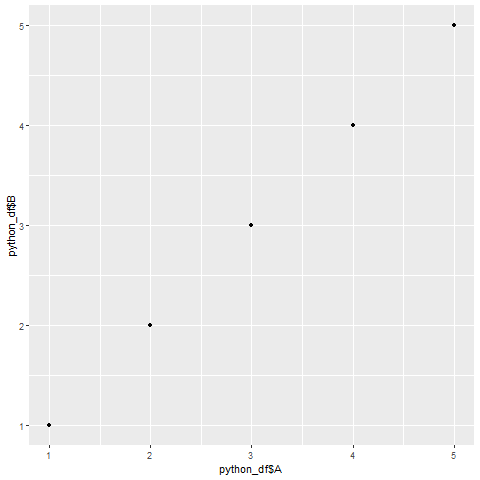

In [16]:
%%R -i python_df
# ^ importing the DataFrame into the R instance

# Plotting the Python DataFrame in R
qplot(python_df$A, python_df$B)

In [18]:
%%R -o model -o coef
# Outputting model and coef from R to Python

# Creating a linear regression model
model <- lm(B ~ A, data = python_df)
coef <- model$coefficients

In [21]:
print(model); print(coef)



Call:

lm(formula = B ~ A, data = python_df)



Coefficients:

(Intercept)            A  

  3.972e-16    1.000e+00  



 (Intercept)            A 

3.972055e-16 1.000000e+00 



An alternative method is to use the magic functions __%Rpush__ and __%Rget__

In [22]:
%%R
# Creating simple R dataframe
library(datasets)
cars <- head(cars, 5)

In [24]:
# Requesting object from R instance
python_cars = %Rget cars
print(python_cars)

   speed  dist
1    4.0   2.0
2    4.0  10.0
3    7.0   4.0
4    7.0  22.0
5    8.0  16.0


In [25]:
# Create some arbitary data to be passed through
python_x = np.array([1, 2, 3, 4, 5])
python_y = np.array([1, 2, 3, 4,5 ])

# Pushing the data through to R
%Rpush python_x python_y

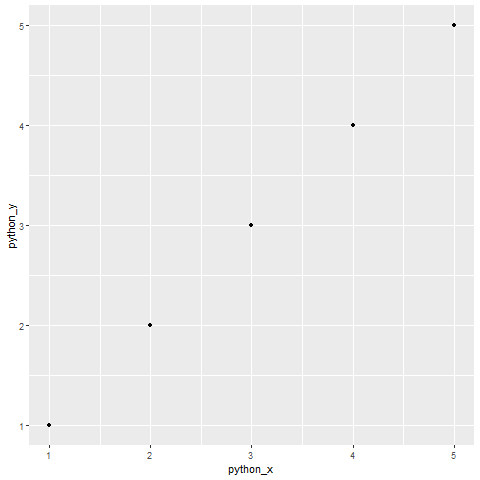

In [27]:
%%R
# ^ make sure this is an R instance
qplot(python_x, python_y)

## Markdown Shortcuts and Formatting

__Headings:__ Use `#`'s followed by a blank space for titles and headings<br>
`#` title<br>
`##` major headings<br>
`###` minor headings<br>
`####` subheadings<br>

__Emphasis:__ For bold use double underscore or asterisk. For italic single underscore or asterisk<br>
`__string__` or `**string**` **bold**<br>
`_string_` or `*string*` *italic*<br>

__Mathematical Symbols:__ __[check here for examples](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html)__<br>
Jupter can display mathematical notation, for instance:<br>
<br>
\begin{equation*}
1 +  \frac{q^2}{(1-q)}+\frac{q^6}{(1-q)(1-q^2)}+\cdots =
\prod_{j=0}^{\infty}\frac{1}{(1-q^{5j+2})(1-q^{5j+3})},
\quad\quad \text{for $|q|<1$}.
\end{equation*}<br>
<br>
__Line Breaks:__ Line breaks can be included using either the `<br>` tag or a double space<br>
<br>
__Monospace Font:__ This is for highlighting code, filepaths, filenames etc in markdown. Enclose the text with single backticks from the top left of the keyboard <br>
<br>
__Colours:__ Use this code: `<font color=blue|red|green|pink|yellow>Text</font>` but only select one colour from the list and replace `Text`<br> 
<font color=red>Red</font> is my favourite <font color=green>colour</font> <br>
<br>
__Bullet Points:__ Use the dash (`-`) or asterisk (`*`) sign followed by two space after it to create a bullet point. To create a sub bullet use a tab followed by a dash and two spaces<br>
- Bullet<br>
    - sub-bullet<br>
        - sub-sub-bullet<br>
            - etc <br>

__Numbered Lists:__ Start with `1.` followed by a space and then carry on using 1. and it will automatically number it. Use tab to indent for sublists<br>
1.  my list<br>
1.  my list 2
    1. sub-list
        1. sub-sub list
            1. etc.<br>
            
__Graphics:__ Image files can attached to the notebook directly from a local drive only in the markdown cells. For code cells  you can only use cells hosted on the web. Captions can not be added at this time. Use this code: `<img src="url.gif" alt="Alt text that describes the graphic" title="Title text" />` 
<img src="C:\Users\CSmyth\Pictures\hackerman.gif" alt="git gud" title="" /> <br>
<br>
__Internal Links:__ To link a section within the notebook use this code: `[section title](#section title)` make sure to check the links all work. This will also encourage the following of best practice for notebook writing.<br>
[link to top](#Jupyter-Cheatsheet)<br>
Alternatively, you can add an ID for a section right above the cell. This cell will also be invisble. This is useful when linking to a specific code chunk. Use the following code for the __tag__ `<a id="section_ID"></a>` and the following for the __link__ `[section title](#section_ID)` make sure all links are checked<br>
<br>
__External Links:__ Use the following and remember to test all links! `__[link text](http://url)__`


## Version Control

V1: 25/01/2019 : Initial commit